In [1]:
TARGET='exactly_.+'
TOKEN_TYPE='bigram'
FRQ_FLOOR=5
SELECT_SEP = ': '
COMPARE_SEP = '~'

In [2]:
import pandas as pd 
from pathlib import Path
from am_notebooks import *

from source.utils.associate import AM_DF_DIR, POLAR_DIR, TOP_AM_DIR, ALPHA
from source.utils.dataframes import enhance_descrip

ASSETS_PATH=Path('/home/arh234/WinHome/Documents/dissertex/justwriting/assets')
TARGET_OUT=ASSETS_PATH/TARGET
confirm_dir(TARGET_OUT)

REGEX_TARGET = any(re.findall(r"[^\w'-]", TARGET))
PARTIAL_TARGET = (TOKEN_TYPE == 'bigram') and TARGET.strip(
        '_').count('_') != 1

In [3]:
am_dfs = pd.Series(POLAR_DIR.rglob(f'{TOKEN_TYPE}/extra/*min{FRQ_FLOOR}x*.parq'))
am_dfs.index = am_dfs.index + 1
# for i,ad in enumerate(am_dfs, start=1): 
#     print(f'{i}) {ad.relative_to(AM_DF_DIR)}')
print(am_dfs.to_frame('path').to_markdown(tablefmt='simple_grid') )

┌────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │ path                                                                                                                     │
├────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  1 │ /share/compling/projects/sanpi/results/assoc_df/polar/RBdirect/bigram/extra/polarized-bigram_ALL-direct_min5x_extra.parq │
├────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  2 │ /share/compling/projects/sanpi/results/assoc_df/polar/RBdirect/bigram/extra/polarized-bigram_NEQ-direct_min5x_extra.parq │
├────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  3 │ /share/compling/projects/sanpi/results/assoc_df/polar/mirror/bigram/extra/polarized

In [4]:
focus = FOCUS_DICT['NEQ']['polar']
pd.set_option("display.float_format", '{:,.2f}'.format)
pd.set_option('display.width', 240)
# df.select_dtypes(include='number').filter(regex=r'^f$|^f.*[^d]$').iloc[:, :3].apply(lambda x: x - x.mean())

In [5]:
def mean_standardize(df): 
    numerical_df = df.select_dtypes(include='number')
    mean_ctr_df = numerical_df.apply(lambda x: x - x.mean())
    mean_std_df = numerical_df.loc[:, numerical_df.mean().abs() >= 1].apply(lambda c: c / c.mean())
    return df.join(mean_ctr_df, rsuffix='_mctr').join(mean_std_df, rsuffix='_mstd')

In [6]:

# mean_standardized = {}
# for am_path in am_dfs:
#     # print('', am_path.stem, sep='\n', end='\n\n')
#     raw_df = adjust_am_names(pd.read_parquet(am_path).filter(focus + ['f_sqrt', 'f2_sqrt']))
#     # mean_std_df = raw_df.select_dtypes(include='number')
#     # show_sample(enhance_descrip(
#     #     mean_std_df
#     #     .drop(columns=['N', 'f1'])
#     #     .assign(
#     #     P1=mean_std_df.P1 * 100, P2=mean_std_df.P2 * 100, 
#     #     dP1=mean_std_df.dP1 * 100, dP2=mean_std_df.dP2 *100)
#     #     .rename(columns={p: f'{p}_as%' for p in ['P1', 'P2', 'dP1', 'dP2']}))
#     #             .drop(columns=['total']), n_dec=2, format='simple_grid')
    
#     # mean_std_df = mean_std_df.apply(lambda x: x - x.mean())
#     # print('\n**Mean Standardized**')
#     # show_sample(enhance_descrip(mean_std_df.drop(columns=['N', 'f1'])).drop(columns=['total', 'var_coeff']), n_dec=2, format='simple_grid')
#     # print(raw_plus_mctr.nlargest(5, METRIC_PRIORITY_DICT['NEQ']).to_markdown(floatfmt=',.2f', tablefmt='simple_grid', intfmt=','))
#     mean_standardized[am_path.name.removesuffix('_extra.parq').removeprefix('polarized-')
#                       ] = mean_standardize(raw_df)
#     # raw_df.join(mean_std_df, rsuffix='_mctr').sort_index(axis=1)
# # for am_space, df in mean_standardized.items():
# #     nb_show_table(df.filter(regex=r'LRC|G2|P|^f\d?').sort_values('LRC_mctr', ascending=False).head(8),
# #                   title=f'\n### `{am_space}`\n')
# mctr_target_am = pd.concat([mdf.filter(like=TARGET, axis=0) for mdf in mean_standardized.values()])

## Load AMs for targeted lexical type and combine different perspectives

In [7]:
def infer_data_selection(path, df):
    grandparent = path.parent.parent
    _polar = 'polar' in path.parts
    return df.assign(
                pos_selected=path.name.removeprefix(
                    f'polarized-{TOKEN_TYPE}_' if _polar else 'AdvAdj_')[:3] + '+',
                
                approx=(grandparent.parent if _polar else grandparent).name[-6:])


In [8]:

def load_polar_am_for_target(path):
    print('>', path)
    if REGEX_TARGET or PARTIAL_TARGET:
        _df = pd.read_parquet(path).filter(regex=f'{TARGET}', axis=0)
    else:
        _df = pd.read_parquet(path, engine='pyarrow',
                               filters=[('l2', '==', TARGET)])
    if _df.empty: 
        print('  ⚠️ Target', TARGET, 'not found in', path.name)
        return
    return assign_polarity(infer_data_selection(path, _df))

target_comparisons = []
for path in am_dfs:
    found_am = load_polar_am_for_target(path)
    if found_am is not None: 
        target_comparisons.append(found_am)

target_am = update_index(pd.concat(target_comparisons)).reset_index()

> /share/compling/projects/sanpi/results/assoc_df/polar/RBdirect/bigram/extra/polarized-bigram_ALL-direct_min5x_extra.parq


> /share/compling/projects/sanpi/results/assoc_df/polar/RBdirect/bigram/extra/polarized-bigram_NEQ-direct_min5x_extra.parq
> /share/compling/projects/sanpi/results/assoc_df/polar/mirror/bigram/extra/polarized-bigram_ALL-mirror_min5x_extra.parq
> /share/compling/projects/sanpi/results/assoc_df/polar/mirror/bigram/extra/polarized-bigram_NEQ-mirror_min5x_extra.parq


In [9]:
# def load_blind_am_for_target():
#     if TOKEN_TYPE == 'bigram' and not (PARTIAL_TARGET or REGEX_TARGET): 
#         adv_adj_dir = AM_DF_DIR.joinpath('adv_adj')
#         x_paths = list(adv_adj_dir.rglob(f'extra/AdvAdj*min{FRQ_FLOOR}x*.parq'))
#         if not bool(x_paths) or all([p.parent.parent.name.startswith('ANY') for p in x_paths]): 
#             x_paths = list(adv_adj_dir.rglob(f'extra/AdvAdj*final-freq_min10x_extra.parq'))
#         print(pd.Series(x_paths, name='adv_adj/* paths').to_frame().to_markdown(index=None, tablefmt='rst'))
#         return pd.concat(infer_data_selection(x, pd.read_parquet(x, engine='pyarrow', 
#                                          filters=[('key','==', TARGET.replace('_', '~'))]).assign(parq_path=str(x), subset=x.parent.parent.name)) for x in x_paths)
        
# blind_am = load_blind_am_for_target()
# blind_am

In [10]:
# blind_am.subset

In [11]:
# target_am = target_am.assign(
    # compare_key=('*' + target_am.pos_selected.astype('string')
    #              + '*:' + target_am.key.astype('string'))

# regex_target = any(not tp.isalnum() for tp in TARGET.split('_'))
# regex_target

In [12]:
TARGET_FMT = re.sub(r"[\+\*\?\-\.~]+", '', TARGET).strip('_')
TARGET_FMT


'exactly'

In [13]:
target_am

,key,l2,f,E11,am_log_likelihood,am_odds_ratio_disc,am_p1_given2,am_p2_given1,am_p1_given2_simple,am_p2_given1_simple,...,f1_sqrt,f2_sqrt,adv,adj,adv_total,adj_total,l1,pos_selected,approx,polarity
0,COM~exactly_nil,exactly_nil,6,5.74,0.54,-0.22,0.04,0.00,1.00,0.00,...,"8,293.83",2.45,exactly,nil,"56,109.00","1,630.00",COMPLEMENT,ALL+,direct,pos
1,COM~exactly_square,exactly_square,25,42.06,-60.69,-1.22,-0.39,-0.00,0.57,0.00,...,"8,293.83",6.63,exactly,square,"56,109.00","3,527.00",COMPLEMENT,ALL+,direct,pos
2,COM~exactly_applicable,exactly_applicable,8,14.34,-23.69,-1.28,-0.42,-0.00,0.53,0.00,...,"8,293.83",3.87,exactly,applicable,"56,109.00","20,677.00",COMPLEMENT,ALL+,direct,pos
3,COM~exactly_symmetrical,exactly_symmetrical,17,33.46,-65.41,-1.36,-0.47,-0.00,0.49,0.00,...,"8,293.83",5.92,exactly,symmetrical,"56,109.00","3,822.00",COMPLEMENT,ALL+,direct,pos
4,COM~exactly_round,exactly_round,5,10.51,-22.75,-1.41,-0.50,-0.00,0.45,0.00,...,"8,293.83",3.32,exactly,round,"56,109.00","4,802.00",COMPLEMENT,ALL+,direct,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,NEGany~exactly_identical,exactly_identical,5,3.00,2.91,0.56,0.33,0.00,0.83,0.00,...,540.12,2.45,exactly,identical,862.00,208.00,NEGMIR,NEQ+,mirror,neg
1867,NEGany~exactly_right,exactly_right,52,34.00,20.07,0.50,0.26,0.00,0.76,0.00,...,540.12,8.25,exactly,right,862.00,"2,019.00",NEGMIR,NEQ+,mirror,neg
1868,NEGany~exactly_alike,exactly_alike,39,27.00,11.05,0.41,0.22,0.00,0.72,0.00,...,540.12,7.35,exactly,alike,862.00,144.00,NEGMIR,NEQ+,mirror,neg
1869,POS~exactly_alike,exactly_alike,15,27.00,-11.05,-0.41,-0.22,-0.00,0.28,0.00,...,540.12,7.35,exactly,alike,862.00,144.00,POSMIR,NEQ+,mirror,pos


In [14]:
env_cols = ['approx', 'pos_selected', 'polarity']
# focus_cols = []
# for c in FOCUS_DICT['NEQ']['polar']:
#     if c in MISC_AM: 
#         continue
#     if TOKEN_TYPE != 'bigram' and c.startswith(('adv', 'adj')): 
#         continue
#     # if c in ('N', 'f1'):
#     #     focus_cols.append(c)
#     # focus_cols.extend([c, f'{c}_mctr', f'{c}_mstd'] )
#     focus_cols.append(c)
# print(focus_cols)
focus_cols = [c for c in FOCUS_DICT['NEQ']['polar'] 
              if not((c in MISC_AM) or (TOKEN_TYPE != 'bigram' and c.startswith(('adv', 'adj'))))]

In [15]:
def set_comparison(am_df, is_polar:bool = True):
    if am_df.index.name == 'key': 
        am_df = am_df.reset_index()
            
    prepared_key = (am_df.key.astype('string')
                    .str.replace('~', COMPARE_SEP)
                    .str.replace(TARGET_FMT.replace('_', '~'), f'*{TARGET_FMT.replace("_", " ")}*'))
    if not is_polar: 
        prepared_key = '['+ am_df.subset + ']' + prepared_key
     
    comparison=(am_df.pos_selected.astype('string') + SELECT_SEP
                 + prepared_key)
    return am_df.assign(comparison=comparison
    
).set_index('comparison')

target_am = set_comparison(target_am).convert_dtypes()
target_am

,key,l2,f,E11,am_log_likelihood,am_odds_ratio_disc,am_p1_given2,am_p2_given1,am_p1_given2_simple,am_p2_given1_simple,...,f1_sqrt,f2_sqrt,adv,adj,adv_total,adj_total,l1,pos_selected,approx,polarity
comparison,,,,,,,,,,,,,,,,,,,,,
ALL+: COM~*exactly*_nil,COM~exactly_nil,exactly_nil,6,5.74,0.54,-0.22,0.04,0.00,1.00,0.00,...,"8,293.83",2.45,exactly,nil,56109,1630,COMPLEMENT,ALL+,direct,pos
ALL+: COM~*exactly*_square,COM~exactly_square,exactly_square,25,42.06,-60.69,-1.22,-0.39,-0.00,0.57,0.00,...,"8,293.83",6.63,exactly,square,56109,3527,COMPLEMENT,ALL+,direct,pos
ALL+: COM~*exactly*_applicable,COM~exactly_applicable,exactly_applicable,8,14.34,-23.69,-1.28,-0.42,-0.00,0.53,0.00,...,"8,293.83",3.87,exactly,applicable,56109,20677,COMPLEMENT,ALL+,direct,pos
ALL+: COM~*exactly*_symmetrical,COM~exactly_symmetrical,exactly_symmetrical,17,33.46,-65.41,-1.36,-0.47,-0.00,0.49,0.00,...,"8,293.83",5.92,exactly,symmetrical,56109,3822,COMPLEMENT,ALL+,direct,pos
ALL+: COM~*exactly*_round,COM~exactly_round,exactly_round,5,10.51,-22.75,-1.41,-0.50,-0.00,0.45,0.00,...,"8,293.83",3.32,exactly,round,56109,4802,COMPLEMENT,ALL+,direct,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEQ+: NEGany~*exactly*_identical,NEGany~exactly_identical,exactly_identical,5,3.00,2.91,0.56,0.33,0.00,0.83,0.00,...,540.12,2.45,exactly,identical,862,208,NEGMIR,NEQ+,mirror,neg
NEQ+: NEGany~*exactly*_right,NEGany~exactly_right,exactly_right,52,34.00,20.07,0.50,0.26,0.00,0.76,0.00,...,540.12,8.25,exactly,right,862,2019,NEGMIR,NEQ+,mirror,neg
NEQ+: NEGany~*exactly*_alike,NEGany~exactly_alike,exactly_alike,39,27.00,11.05,0.41,0.22,0.00,0.72,0.00,...,540.12,7.35,exactly,alike,862,144,NEGMIR,NEQ+,mirror,neg


In [16]:
# blind_am = set_comparison(blind_am, is_polar=False)
# blind_am

In [17]:
(target_am.value_counts(env_cols)
 .to_frame("total $" + re.sub(r'[^a-z]+', '~*', TARGET) + "$" 
           + (f' bigrams' if TOKEN_TYPE=='bigram' else '')
           +' $(f\geq'+f'{FRQ_FLOOR})$')
 .reset_index().sort_values(env_cols)
 .to_markdown(cobble_dated_path(f'env-totals_{TARGET_FMT}-{TOKEN_TYPE}', TARGET_OUT, suffix='.md'),
              intfmt=',', index=None))

In [18]:
all_cols_csv = TARGET_OUT/f'EveryEnv-{TARGET.capitalize()}_am.{timestamp_today()}.csv'
# target_am.to_csv(all_cols_csv)  # <-- to force rewrite
if not all_cols_csv.is_file():
    target_am.to_csv(all_cols_csv)

In [19]:
# blind_am = adjust_am_names(blind_am).filter(['subset'] + adjust_am_names([c for c in FOCUS_DICT['NEQ']['adv_adj'] if c not in MISC_AM]))
# blind_am.filter(regex=r'ALL|RB', axis=0).set_index(['l1', 'l2', 'subset'])

In [20]:
target_am

,key,l2,f,E11,am_log_likelihood,am_odds_ratio_disc,am_p1_given2,am_p2_given1,am_p1_given2_simple,am_p2_given1_simple,...,f1_sqrt,f2_sqrt,adv,adj,adv_total,adj_total,l1,pos_selected,approx,polarity
comparison,,,,,,,,,,,,,,,,,,,,,
ALL+: COM~*exactly*_nil,COM~exactly_nil,exactly_nil,6,5.74,0.54,-0.22,0.04,0.00,1.00,0.00,...,"8,293.83",2.45,exactly,nil,56109,1630,COMPLEMENT,ALL+,direct,pos
ALL+: COM~*exactly*_square,COM~exactly_square,exactly_square,25,42.06,-60.69,-1.22,-0.39,-0.00,0.57,0.00,...,"8,293.83",6.63,exactly,square,56109,3527,COMPLEMENT,ALL+,direct,pos
ALL+: COM~*exactly*_applicable,COM~exactly_applicable,exactly_applicable,8,14.34,-23.69,-1.28,-0.42,-0.00,0.53,0.00,...,"8,293.83",3.87,exactly,applicable,56109,20677,COMPLEMENT,ALL+,direct,pos
ALL+: COM~*exactly*_symmetrical,COM~exactly_symmetrical,exactly_symmetrical,17,33.46,-65.41,-1.36,-0.47,-0.00,0.49,0.00,...,"8,293.83",5.92,exactly,symmetrical,56109,3822,COMPLEMENT,ALL+,direct,pos
ALL+: COM~*exactly*_round,COM~exactly_round,exactly_round,5,10.51,-22.75,-1.41,-0.50,-0.00,0.45,0.00,...,"8,293.83",3.32,exactly,round,56109,4802,COMPLEMENT,ALL+,direct,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEQ+: NEGany~*exactly*_identical,NEGany~exactly_identical,exactly_identical,5,3.00,2.91,0.56,0.33,0.00,0.83,0.00,...,540.12,2.45,exactly,identical,862,208,NEGMIR,NEQ+,mirror,neg
NEQ+: NEGany~*exactly*_right,NEGany~exactly_right,exactly_right,52,34.00,20.07,0.50,0.26,0.00,0.76,0.00,...,540.12,8.25,exactly,right,862,2019,NEGMIR,NEQ+,mirror,neg
NEQ+: NEGany~*exactly*_alike,NEGany~exactly_alike,exactly_alike,39,27.00,11.05,0.41,0.22,0.00,0.72,0.00,...,540.12,7.35,exactly,alike,862,144,NEGMIR,NEQ+,mirror,neg


In [21]:
target_am.filter(env_cols + focus_cols)

,approx,pos_selected,polarity,f,am_p1_given2,conservative_log_ratio,am_p1_given2_simple,am_log_likelihood,l1,l2,...,N,E11,unexpected_f,unexpected_ratio,am_p2_given1,am_p2_given1_simple,adv,adv_total,adj,adj_total
comparison,,,,,,,,,,,,,,,,,,,,,
ALL+: COM~*exactly*_nil,direct,ALL+,pos,6,0.04,0.00,1.00,0.54,COMPLEMENT,exactly_nil,...,71961373,5.74,0.26,0.04,0.00,0.00,exactly,56109,nil,1630
ALL+: COM~*exactly*_square,direct,ALL+,pos,25,-0.39,-1.17,0.57,-60.69,COMPLEMENT,exactly_square,...,71961373,42.06,-17.06,-0.68,-0.00,0.00,exactly,56109,square,3527
ALL+: COM~*exactly*_applicable,direct,ALL+,pos,8,-0.42,0.00,0.53,-23.69,COMPLEMENT,exactly_applicable,...,71961373,14.34,-6.34,-0.79,-0.00,0.00,exactly,56109,applicable,20677
ALL+: COM~*exactly*_symmetrical,direct,ALL+,pos,17,-0.47,-1.43,0.49,-65.41,COMPLEMENT,exactly_symmetrical,...,71961373,33.46,-16.46,-0.97,-0.00,0.00,exactly,56109,symmetrical,3822
ALL+: COM~*exactly*_round,direct,ALL+,pos,5,-0.50,0.00,0.45,-22.75,COMPLEMENT,exactly_round,...,71961373,10.51,-5.51,-1.10,-0.00,0.00,exactly,56109,round,4802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEQ+: NEGany~*exactly*_identical,mirror,NEQ+,neg,5,0.33,0.00,0.83,2.91,NEGMIR,exactly_identical,...,583470,3.00,2.00,0.40,0.00,0.00,exactly,862,identical,208
NEQ+: NEGany~*exactly*_right,mirror,NEQ+,neg,52,0.26,0.00,0.76,20.07,NEGMIR,exactly_right,...,583470,34.00,18.00,0.35,0.00,0.00,exactly,862,right,2019
NEQ+: NEGany~*exactly*_alike,mirror,NEQ+,neg,39,0.22,0.00,0.72,11.05,NEGMIR,exactly_alike,...,583470,27.00,12.00,0.31,0.00,0.00,exactly,862,alike,144


In [22]:
# lrc_variety_path = TARGET_OUT/f'{TARGET}_LRCvariations.{timestamp_today()}.md'
# if not lrc_variety_path.is_file():
    
#     # target_am.update(target_am.select_dtypes(include='float').apply(pd.to_numeric, downcast='float'))
#     lrc_vals = adjust_am_names(target_am.filter(regex=r'conservative|pr?o[lx]|select'))
#     lrc_vals = lrc_vals.round(3).rename(columns={'LRC': f'LRC[_{str(ALPHA).removeprefix("0.")}]', 
#                                     'LRC_nc': 'LRC_no-correction', 
#                                     'LRC_dv': 'LRC_default-vocab-size'}).sort_values(env_cols)
#     nb_show_table(lrc_vals[env_cols+ lrc_vals.filter(like='LRC').columns.tolist()], 
#                 outpath= lrc_variety_path, n_dec=3)

In [23]:
target_am = adjust_am_names(
    target_am[env_cols].join(target_am.filter([c for c in focus_cols if c not in env_cols])))

target_am = target_am.sort_values(env_cols)

target_am = target_am.reset_index().set_index(env_cols).reset_index().set_index('comparison')

In [24]:
target_am

,approx,pos_selected,polarity,f,dP1,LRC,P1,G2,l1,l2,...,N,exp_f,unexp_f,unexp_r,dP2,P2,adv,adv_total,adj,adj_total
comparison,,,,,,,,,,,,,,,,,,,,,
ALL+: NEGany~*exactly*_able,direct,ALL+,neg,32,0.87,4.08,0.91,179.55,NEGATED,exactly_able,...,71961373,1.54,30.46,0.95,0.00,0.00,exactly,56109,able,210786
ALL+: NEGany~*exactly*_abnormal,direct,ALL+,neg,5,0.96,0.00,1.00,31.21,NEGATED,exactly_abnormal,...,71961373,0.22,4.78,0.96,0.00,0.00,exactly,56109,abnormal,2889
ALL+: NEGany~*exactly*_aboveboard,direct,ALL+,neg,5,0.96,0.00,1.00,31.21,NEGATED,exactly_aboveboard,...,71961373,0.22,4.78,0.96,0.00,0.00,exactly,56109,aboveboard,116
ALL+: NEGany~*exactly*_abundant,direct,ALL+,neg,25,0.96,4.22,1.00,156.06,NEGATED,exactly_abundant,...,71961373,1.10,23.90,0.96,0.00,0.00,exactly,56109,abundant,19650
ALL+: NEGany~*exactly*_acceptable,direct,ALL+,neg,12,0.96,2.44,1.00,74.91,NEGATED,exactly_acceptable,...,71961373,0.53,11.47,0.96,0.00,0.00,exactly,56109,acceptable,43828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEQ+: NEGany~*exactly*_true,mirror,NEQ+,neg,12,0.42,0.00,0.92,10.97,NEGMIR,exactly_true,...,583470,6.50,5.50,0.46,0.00,0.00,exactly,862,true,2870
NEQ+: NEGany~*exactly*_wrong,mirror,NEQ+,neg,178,0.40,1.51,0.90,144.88,NEGATED,exactly_wrong,...,6347362,99.00,79.00,0.44,0.00,0.00,exactly,44378,wrong,21208
NEQ+: NEGany~*exactly*_wrong,mirror,NEQ+,neg,21,0.50,0.00,1.00,29.11,NEGMIR,exactly_wrong,...,583470,10.50,10.50,0.50,0.00,0.00,exactly,862,wrong,8526


In [121]:
MET_PRI = METRIC_PRIORITY_DICT['ALL'][:2]
lrc_dp1 = target_am.filter(
    MET_PRI + ['P1'] +  env_cols)
# lrc_dp1.columns = [f'{TARGET_FMT}-{TOKEN_TYPE}_{c}' if c in MET_PRI + ['P1'] + FREQ_COLS else c for c in lrc_dp1.columns]
lrc_dp1


,dP1,LRC,P1,approx,pos_selected,polarity
comparison,,,,,,
ALL+: NEGany~*exactly*_able,0.8702,4.0782,0.9143,direct,ALL+,neg
ALL+: NEGany~*exactly*_abnormal,0.9559,0.0000,1.0000,direct,ALL+,neg
ALL+: NEGany~*exactly*_aboveboard,0.9559,0.0000,1.0000,direct,ALL+,neg
ALL+: NEGany~*exactly*_abundant,0.9559,4.2199,1.0000,direct,ALL+,neg
ALL+: NEGany~*exactly*_acceptable,0.9559,2.4415,1.0000,direct,ALL+,neg
...,...,...,...,...,...,...
NEQ+: NEGany~*exactly*_true,0.4231,0.0000,0.9231,mirror,NEQ+,neg
NEQ+: NEGany~*exactly*_wrong,0.3990,1.5104,0.8990,mirror,NEQ+,neg
NEQ+: NEGany~*exactly*_wrong,0.5000,0.0000,1.0000,mirror,NEQ+,neg


approx
direct    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
mirror    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

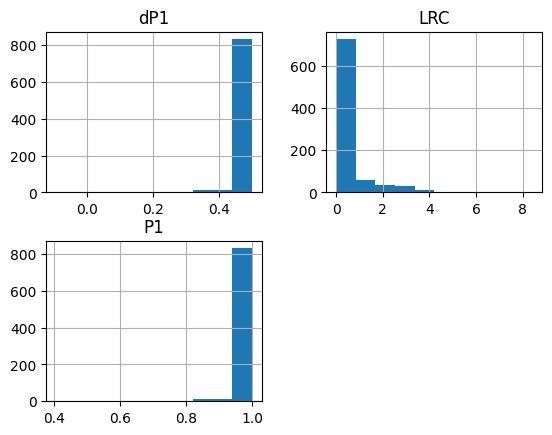

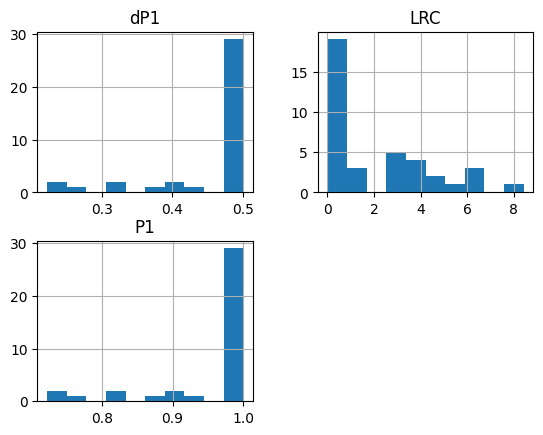

In [129]:
lrc_dp1.filter(like='NEQ+: NEG', axis=0).groupby('approx').hist()

pos_selected  approx
ALL+          direct    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
              mirror    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
NEQ+          direct    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
              mirror    [[Axes(0.125,0.545217;0.336957x0.334783), Axes...
dtype: object

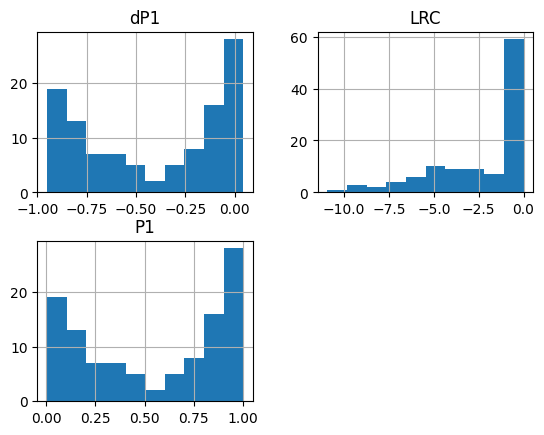

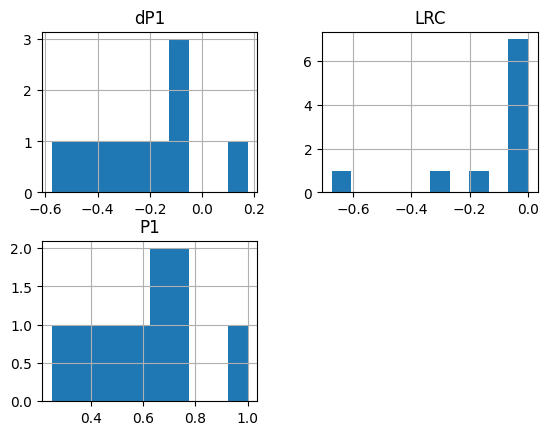

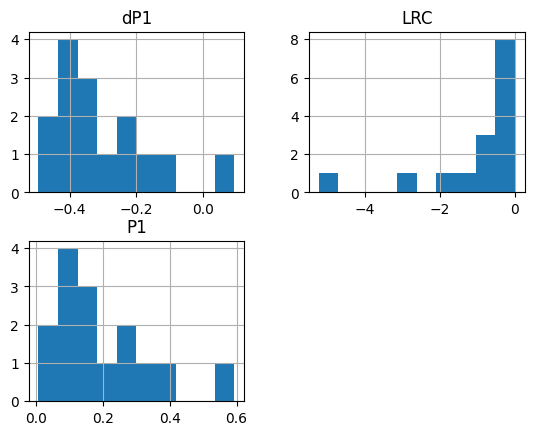

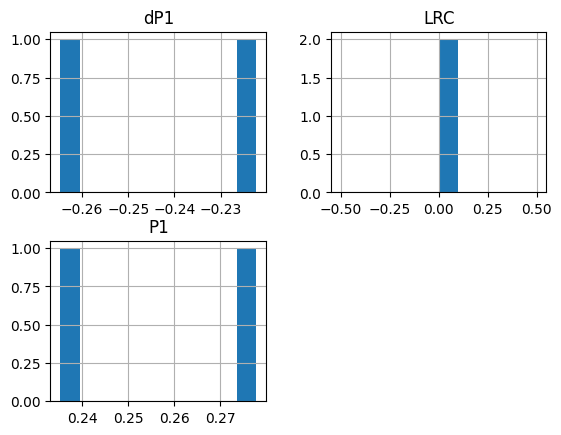

In [141]:
lrc_dp1.filter(like='O', axis=0).groupby(['pos_selected', 'approx']).hist()

In [119]:
all_stats = lrc_dp1.describe()
all_q3 = all_stats.loc['75%', :].to_frame('all_75%')
print(f'Stats for all {TOKEN_TYPE} evaluations matching *{TARGET_FMT}* (s.t. $f\geq {FRQ_FLOOR}$)')
all_stats


Stats for all bigram evaluations matching *exactly* (s.t. $f\geq 5$)


,dP1,LRC,P1
count,"1,947.0000","1,947.0000","1,947.0000"
mean,0.6141,1.2350,0.9322
std,0.3627,2.2686,0.1863
min,-0.9508,-10.9250,0.0052
25%,0.5000,0.0000,0.9868
50%,0.5000,0.0000,1.0000
75%,0.9559,2.3314,1.0000
max,0.9559,10.9250,1.0000


In [120]:
lrc_dp1.filter(like='dP1').filter(like='NEG', axis=0).groupby('approx').hist()

KeyError: 'approx'

In [99]:
all_neg_stats = lrc_dp1.filter(like='NEG', axis=0).describe()
all_neg_q3 = all_neg_stats.loc['75%', :].to_frame(f'{TARGET_FMT}_negONLY_75%')
all_neg_stats


,dP1,LRC,P1,f,f1,f2
count,"1,810.0000","1,810.0000","1,810.0000","1,810.0000","1,810.0000","1,810.0000"
mean,0.6890,1.4682,0.9637,64.9370,"3,052,671.1127",75.8635
std,0.2304,2.0645,0.1164,436.4100,"578,174.0705",486.1043
min,-0.0938,0.0000,0.0278,5.0000,"291,735.0000",5.0000
25%,0.5000,0.0000,1.0000,7.0000,"3,173,681.0000",7.0000
50%,0.5000,0.1128,1.0000,12.0000,"3,173,681.0000",13.0000
75%,0.9559,2.6653,1.0000,31.0000,"3,173,681.0000",32.0000
max,0.9559,10.9250,1.0000,"8,794.0000","3,173,681.0000","8,840.0000"


In [100]:
all_pos_stats = lrc_dp1.loc[lrc_dp1.polarity=='pos'].describe()
all_pos_q3 = all_pos_stats.loc['75%', :].to_frame('posONLY_75%')
all_pos_stats


,dP1,LRC,P1,f,f1,f2
count,137.0000,137.0000,137.0000,137.0000,137.0000,137.0000
mean,-0.3745,-1.8452,0.5154,87.9927,"55,684,115.2190",261.3212
std,0.3428,2.5829,0.3582,488.4501,"26,549,611.2910",954.2236
min,-0.9508,-10.9250,0.0052,5.0000,"291,735.0000",5.0000
25%,-0.7233,-3.3991,0.1786,6.0000,"68,787,692.0000",14.0000
50%,-0.2892,-0.2421,0.4545,10.0000,"68,787,692.0000",45.0000
75%,-0.0764,0.0000,0.8589,25.0000,"68,787,692.0000",121.0000
max,0.1736,0.0000,1.0000,"5,635.0000","68,787,692.0000","8,840.0000"


In [101]:
stats_juxta = all_neg_stats.join(all_stats, lsuffix='_neg-only').join(all_pos_stats, rsuffix='_pos-only').T
stats_juxta.index = stats_juxta.index.str.replace(r'^(.+[^y])$', r'\1_combined', regex=True)
stats_juxta['count'] = pd.to_numeric(stats_juxta['count'], downcast='unsigned')
stats_juxta.filter(like='LRC', axis=0)

,count,mean,std,min,25%,50%,75%,max
LRC_neg-only,1810,1.4682,2.0645,0.0000,0.0000,0.1128,2.6653,10.9250
LRC_combined,1947,1.2350,2.2686,-10.9250,0.0000,0.0000,2.3314,10.9250
LRC_pos-only,137,-1.8452,2.5829,-10.9250,-3.3991,-0.2421,0.0000,0.0000


In [102]:
stats_juxta.filter(like='dP1', axis=0)

,count,mean,std,min,25%,50%,75%,max
dP1_neg-only,1810,0.6890,0.2304,-0.0938,0.5000,0.5000,0.9559,0.9559
dP1_combined,1947,0.6141,0.3627,-0.9508,0.5000,0.5000,0.9559,0.9559
dP1_pos-only,137,-0.3745,0.3428,-0.9508,-0.7233,-0.2892,-0.0764,0.1736


In [109]:
for m in (METRIC_PRIORITY_DICT['ALL'][:2] + ['P1', 'f']):
    _stats_compare = stats_juxta.filter(regex=r'^'+m+r'_(?:neg|pos|com).+$|^'+m+r'$', axis=0)
    _stats_compare.index = _stats_compare.index.str.removeprefix(f'{m}_')
    nb_show_table(_stats_compare, n_dec = 2, title=f'\n*{TARGET_FMT}* {TOKEN_TYPE} `{m}` stats\n'
            #   outpath=cobble_dated_path(
            #       data_dir=TARGET_OUT, suffix='.md', 
            #                             undated_stem=f'{TARGET_FMT}-{TOKEN_TYPE}-stats_full-and-polarities')
              )


*exactly* bigram `dP1` stats

|              |   `count` |   `mean` |   `std` |   `min` |   `25%` |   `50%` |   `75%` |   `max` |
|:-------------|----------:|---------:|--------:|--------:|--------:|--------:|--------:|--------:|
| **neg-only** |     1,810 |     0.69 |    0.23 |   -0.09 |    0.50 |    0.50 |    0.96 |    0.96 |
| **combined** |     1,947 |     0.61 |    0.36 |   -0.95 |    0.50 |    0.50 |    0.96 |    0.96 |
| **pos-only** |       137 |    -0.37 |    0.34 |   -0.95 |   -0.72 |   -0.29 |   -0.08 |    0.17 |


*exactly* bigram `LRC` stats

|              |   `count` |   `mean` |   `std` |   `min` |   `25%` |   `50%` |   `75%` |   `max` |
|:-------------|----------:|---------:|--------:|--------:|--------:|--------:|--------:|--------:|
| **neg-only** |     1,810 |     1.47 |    2.06 |    0.00 |    0.00 |    0.11 |    2.67 |   10.93 |
| **combined** |     1,947 |     1.24 |    2.27 |  -10.93 |    0.00 |    0.00 |    2.33 |   10.93 |
| **pos-only** |       137 |    -1.85

In [104]:
all_q3.join(all_neg_q3).join(all_pos_q3)

,all_75%,exactly_negONLY_75%,posONLY_75%
dP1,0.9559,0.9559,-0.0764
LRC,2.3314,2.6653,0.0000
P1,1.0000,1.0000,0.8589
f,30.0000,31.0000,25.0000
f1,"3,173,681.0000","3,173,681.0000","68,787,692.0000"
f2,35.0000,32.0000,121.0000


In [31]:
target_am.copy().set_index(env_cols + ['l2'])

f   dP1  LRC   P1     G2       l1       f1   f2         N  exp_f  unexp_f  unexp_r   dP2   P2      adv  adv_total         adj  adj_total
approx pos_selected polarity l2                                                                                                                                                            
direct ALL+         neg      exactly_able         32  0.87 4.08 0.91 179.55  NEGATED  3173681   35  71961373   1.54    30.46     0.95  0.00 0.00  exactly      56109        able     210786
                             exactly_abnormal      5  0.96 0.00 1.00  31.21  NEGATED  3173681    5  71961373   0.22     4.78     0.96  0.00 0.00  exactly      56109    abnormal       2889
                             exactly_aboveboard    5  0.96 0.00 1.00  31.21  NEGATED  3173681    5  71961373   0.22     4.78     0.96  0.00 0.00  exactly      56109  aboveboard        116
                             exactly_abundant     25  0.96 4.22 1.00 156.06  NEGATED  3173681   25  71961373   1.10    23.90     0.96  0.00 0.00  exactly      56109    abundant      19650
                             exactly_acceptable   12  0.96 2.44 1.00  74.91  NEGATED  3173681   12  71961373   0.53    11.47     0.96  0.00 0.00  exactly      56109  acceptable      43828
...                                              ...   ...  ...  ...    ...      ...      ...  ...       ...    ...      ...      ...   ...  ...      ...        ...         ...        ...
mirror NEQ+         neg      exactly_true         12  0.42 0.00 0.92  10.97   NEGMIR   291735   13    583470   6.50     5.50     0.46  0.00 0.00  exactly        862        true       2870
                             exactly_wrong       178  0.40 1.51 0.90 144.88  NEGATED  3173681  198   6347362  99.00    79.00     0.44  0.00 0.00  exactly      44378       wrong      21208
                             exactly_wrong        21  0.50 0.00 1.00  29.11   NEGMIR   291735   21    583470  10.50    10.50     0.50  0.00 0.00  exactly        862       wrong       8526
                    pos      exactly_alike        15 -0.22 0.00 0.28 -11.05   POSMIR   291735   54    583470  27.00   -12.00    -0.80 -0.00 0.00  exactly        862       alike        144
                             exactly_right        16 -0.26 0.00 0.24 -20.07   POSMIR   291735   68    583470  34.00   -18.00    -1.12 -0.00 0.00  exactly        862       right       2019

[1947 rows x 18 columns]

### Environments Overview

In [32]:
# Output environment overview table
env_info_path = cobble_dated_path(data_dir=TARGET_OUT.parent, suffix='.md',
                                  undated_stem='envs_overview')
if not env_info_path.is_file():
    dir_names = {'NEGATED': '`RBdirect`',
                 'COMPLEMENT': '`not-RBdirect`',
                 'NEGMIR': '`NEGmirror`',
                 'POSMIR': '`POSmirror`'}
    aliases = {'NEGATED': '$*N$; NEGany',
               'COMPLEMENT': '$*C_N$; $*\complement_N$; COM',
               'NEGMIR': '$@N$; NEGmir',
               'POSMIR': '$@P$; POS',
               'neg': '$(-)$',
               'pos': '$(+)$',
               'direct': 'super(set); setdiff; neg-absent',
               'mirror': 'subset; pos-present'}

    env_info = target_am[['approx', 'pos_selected', 'l1']].assign(
        approx=(target_am.approx + '^[aliases: ' +
                target_am.approx.map(aliases) + ']'),
        env_key=target_am.index.str.removesuffix('∩*exactly*'),
        polarity=target_am.polarity + ' ' + target_am.polarity.map(aliases),
        directory=target_am.l1.map(dir_names),
        aliases=target_am.l1.map(aliases),
    )
    env_info = env_info.rename(columns={
        'approx': 'polarity approximation method',
        'pos_selected': '(positive) tokens selected',
        'env_key': 'environment key',
        'directory': 'processing directory'})

    env_info.to_markdown(env_info_path, index=None)

### Normalized Frequencies

In [33]:
N_vals = target_am.N
pd.set_option("display.float_format", '{:,.4f}'.format)
normed_counts = target_am.filter(['f',  # 'f1',
                           'f2', 'adj_total']).apply(
    lambda r: r/N_vals[r.name], axis=1).multiply(100).round(3)
normed_counts.columns = normed_counts.columns.astype('string') + r'%N'

target_am.filter(env_cols + ['l2']).join(
    normed_counts.join(
        target_am.filter(['adj', 'f', 'f2', 'adj_total'])
    ).sort_index(axis=1)
).sort_values(by=['f%N', 'adj_total', 'f2'], ascending=False)

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
normed_counts_view = target_am.filter(
    env_cols + ['l2']
).join(
    normed_counts.join(
        target_am.filter(['adj_total', 'f2', 'f']))
    .sort_index(axis=1)
    ).sort_values([c for c in ['f', 'f2', 'adj_total'] if c in target_am.columns], 
                  ascending=False)

pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
(normed_counts_view
 .assign(f_bin=target_am.f.round(-1).astype('float'),
         f2_bin=target_am.f2.round(-2).astype('float'),
         adj_bin=target_am.adj_total.round(-3).astype('float'),
         f1_bin=target_am.f1.round(-5).astype('float'),
         N_bin=target_am.N.round(-5).astype('float'))
 .sort_values(['f2_bin', 'f_bin', 'adj_bin'], ascending=False))

,approx,pos_selected,polarity,l2,adj_total,adj_total%N,f,f%N,f2,f2%N,f_bin,f2_bin,adj_bin,f1_bin,N_bin
comparison,,,,,,,,,,,,,,,
ALL+: NEGany~*exactly*_sure,direct,ALL+,neg,exactly_sure,256817,357.0m,8794,12.0m,8840,12.0m,8.8k,8.8k,257.0k,3.2M,72.0M
NEQ+: NEGany~*exactly*_sure,direct,NEQ+,neg,exactly_sure,134058,2.1,8794,139.0m,8797,139.0m,8.8k,8.8k,134.0k,3.2M,6.3M
ALL+: COM~*exactly*_sure,direct,ALL+,pos,exactly_sure,256817,357.0m,46,0.0,8840,12.0m,50.0,8.8k,257.0k,68.8M,72.0M
ALL+: COM~*exactly*_right,direct,ALL+,pos,exactly_right,141227,196.0m,5635,8.0m,6269,9.0m,5.6k,6.3k,141.0k,68.8M,72.0M
ALL+: NEGany~*exactly*_right,direct,ALL+,neg,exactly_right,141227,196.0m,634,1.0m,6269,9.0m,630.0,6.3k,141.0k,3.2M,72.0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEQ+: NEGany~*exactly*_side-splitting,direct,NEQ+,neg,exactly_side-splitting,17,0.0,5,0.0,5,0.0,0.0,0.0,0.0,3.2M,6.3M
NEQ+: NEGany~*exactly*_oscar-worthy,direct,NEQ+,neg,exactly_oscar-worthy,13,0.0,5,0.0,5,0.0,0.0,0.0,0.0,3.2M,6.3M
NEQ+: NEGany~*exactly*_earth-shaking,direct,NEQ+,neg,exactly_earth-shaking,11,0.0,5,0.0,5,0.0,0.0,0.0,0.0,3.2M,6.3M


In [ ]:
view_cap = 30
nb_show_table(
    normed_counts_view.head(view_cap),
    n_dec=3, show_index=False,
    outpath=cobble_dated_path(
        data_dir=TARGET_OUT, suffix='.md',
        undated_stem=f'compare-envs~{TARGET}_percents.cap{30}'))

normed_counts


| `approx`   | `pos_selected`   | `polarity`   | `l2`               |   `adj_total` |   `adj_total%N` |   `f` |   `f%N` |   `f2` |   `f2%N` |
|:-----------|:-----------------|:-------------|:-------------------|--------------:|----------------:|------:|--------:|-------:|---------:|
| direct     | ALL+             | neg          | exactly_sure       |       256,817 |           0.357 | 8,794 |   0.012 |  8,840 |    0.012 |
| direct     | NEQ+             | neg          | exactly_sure       |       134,058 |           2.112 | 8,794 |   0.139 |  8,797 |    0.139 |
| direct     | ALL+             | pos          | exactly_right      |       141,227 |           0.196 | 5,635 |   0.008 |  6,269 |    0.009 |
| direct     | ALL+             | neg          | exactly_clear      |       346,404 |           0.481 | 1,746 |   0.002 |  1,779 |    0.002 |
| direct     | NEQ+             | neg          | exactly_clear      |        83,958 |           1.323 | 1,746 |   0.028 |  1,747 |    0.028 |
| dir

,f%N,f2%N,adj_total%N
comparison,,,
ALL+: NEGany~*exactly*_conducive,0.0,0.0,12.0m
ALL+: NEGany~*exactly*_friendly,0.0,0.0,169.0m
ALL+: NEGany~*exactly*_shocking,0.0,0.0,48.0m
ALL+: NEGany~*exactly*_pleasant,0.0,0.0,72.0m
ALL+: NEGany~*exactly*_famous,0.0,0.0,309.0m
...,...,...,...
NEQ+: NEGmir~*exactly*_identical,1.0m,1.0m,36.0m
NEQ+: NEGmir~*exactly*_right,9.0m,12.0m,346.0m
NEQ+: NEGmir~*exactly*_alike,7.0m,9.0m,25.0m


In [ ]:
# pd.set_eng_float_format(use_eng_prefix=True, accuracy=1)
# target_am
pd.set_option("display.float_format", '{:,.2f}'.format)

### Counts/Frequency Columns

In [ ]:
target_count_out = (target_am.copy()
                    .filter(env_cols + ['N', 'f', 'f1', 'f2', 'exp_f', 'unexp_f'])
                    .rename(columns={'f': f'E ∩ *{TARGET}* (f)',
                                     'f1': 'E ∩ $*$ (f1)',
                                     'f2': f'$*$ ∩ *{TARGET}* (f2)',
                                     'N': f'selection total (N)',
                                     'exp_f': 'expected f',
                                     'unexp_f': 'observed f deviation'}
                            ).round())
# target_count_out.index = (target_count_out.index
#                           .str.replace(r'(?<!\*)\b(?![\*\+])', ' ', regex=True)
#                           .str.replace('~', '&')
#                           .str.replace(TARGET, f'*{TARGET}*'))
target_count_out

,approx,pos_selected,polarity,selection total (N),E ∩ *exactly_.+* (f),E ∩ $*$ (f1),$*$ ∩ *exactly_.+* (f2),expected f,observed f deviation
comparison,,,,,,,,,
ALL+: NEGany~*exactly*_conducive,direct,ALL+,neg,71961373,208,3173681,208,9.00,199.00
ALL+: NEGany~*exactly*_friendly,direct,ALL+,neg,71961373,167,3173681,167,7.00,160.00
ALL+: NEGany~*exactly*_shocking,direct,ALL+,neg,71961373,151,3173681,151,7.00,144.00
ALL+: NEGany~*exactly*_pleasant,direct,ALL+,neg,71961373,142,3173681,142,6.00,136.00
ALL+: NEGany~*exactly*_famous,direct,ALL+,neg,71961373,130,3173681,130,6.00,124.00
...,...,...,...,...,...,...,...,...,...
NEQ+: NEGmir~*exactly*_identical,mirror,NEQ+,neg,583470,5,291735,6,3.00,2.00
NEQ+: NEGmir~*exactly*_right,mirror,NEQ+,neg,583470,52,291735,68,34.00,18.00
NEQ+: NEGmir~*exactly*_alike,mirror,NEQ+,neg,583470,39,291735,54,27.00,12.00


In [ ]:
target_count_out.to_markdown(
    cobble_dated_path(data_dir=TARGET_OUT, suffix='.md',
                      undated_stem=f'compare-envs~{TARGET}_counts'),
    floatfmt=',.0f', intfmt=',')

# nb_show_table(target_am.filter(['approx', 'polarity','pos_selected',  'f', 'N', 'f2', 'f1']).rename(
#     columns={'f':f'joint_ENV~{TARGET}',
#              'f1':'E margin',
#              'f2': f'*{TARGET}* margin',
#              'N': 'compare_total'}),
#               adjust_columns=False,
#               outpath= cobble_dated_path(data_dir=TARGET_OUT,
#                                          undated_stem=f'compare-envs~{TARGET}_counts',
#                                          suffix='.md'))
#   outpath=TARGET_OUT/f'compare-envs~{TARGET}_counts.md')

In [ ]:
am_view = target_am.reset_index().set_index(['polarity', 'approx', 'pos_selected']).sort_index()
am_view = am_view.filter(regex=r'^[^ueN]').drop(columns=['f1', 'l1', 'adv_total', 'adv','comparison']+adjust_am_names(P2_COLS)
                                                ).loc[(am_view.f >= 20) & (am_view.adj_total >= 200)]
# if am_view.l2.nunique() > 3:
#     am_view = am_view.sort_values(METRIC_PRIORITY_DICT['ALL'], ascending=False)
am_view

f   dP1   LRC   P1       G2                 l2   f2        adj  adj_total
polarity approx pos_selected                                                                             
neg      direct ALL+          208  0.96  7.80 1.00 1,298.45  exactly_conducive  208  conducive       8990
                ALL+          167  0.96  7.47 1.00 1,042.50   exactly_friendly  167   friendly     121505
                ALL+          151  0.96  7.31 1.00   942.62   exactly_shocking  151   shocking      34742
                ALL+          142  0.96  7.22 1.00   886.44   exactly_pleasant  142   pleasant      51888
                ALL+          130  0.96  7.08 1.00   811.53     exactly_famous  130     famous     222391
...                           ...   ...   ...  ...      ...                ...  ...        ...        ...
pos      direct NEQ+           29 -0.32 -0.70 0.18   -72.34      exactly_alike  162      alike       1092
                NEQ+           20 -0.40 -1.51 0.10  -144.88      exactly_wrong  198      wrong      21208
                NEQ+           23 -0.42 -1.96 0.08  -229.15    exactly_correct  280    correct       9215
         mirror ALL+           81 -0.22 -0.14 0.61   -35.00      exactly_right  133      right       5535
                ALL+           44 -0.30 -0.27 0.53   -38.60      exactly_alike   83      alike        408

[630 rows x 9 columns]

In [ ]:
pos_neq = target_am.loc[(target_am.pos_selected == 'NEQ+') & (target_am.polarity=='pos')]
nb_show_table(
    pd.concat(
        pos_neq.nlargest(5, m).filter(env_cols + ['adj','f', 'dP1', 'P1', 'LRC', 'G2']) 
        for m in ['P1', 'LRC', 'G2']).drop_duplicates().nlargest(8, 'LRC'), 
              show_index=False, 
              outpath=cobble_dated_path(f'strongest-pos-NEQ_{TARGET_FMT}-{TOKEN_TYPE}s', TARGET_OUT, suffix='.md'))


| `approx`   | `pos_selected`   | `polarity`   | `adj`    |   `f` |   `dP1` |   `P1` |   `LRC` |   `G2` |
|:-----------|:-----------------|:-------------|:---------|------:|--------:|-------:|--------:|-------:|
| direct     | NEQ+             | pos          | opposite |    19 |    0.09 |   0.59 |    0.00 |   1.13 |
| direct     | NEQ+             | pos          | zero     |     9 |   -0.11 |   0.39 |    0.00 |  -1.10 |
| direct     | NEQ+             | pos          | same     |    17 |   -0.18 |   0.32 |    0.00 |  -6.97 |
| direct     | NEQ+             | pos          | similar  |    20 |   -0.20 |   0.30 |    0.00 | -11.20 |
| mirror     | NEQ+             | pos          | alike    |    15 |   -0.22 |   0.28 |    0.00 | -11.05 |
| direct     | NEQ+             | pos          | enough   |     9 |   -0.32 |   0.18 |    0.00 | -23.17 |


> saved as:  
> `"/home/arh234/WinHome/Documents/dissertex/justwriting/assets/exactly_.+/strongest-pos-NEQ_exactly-bigrams.2024-08-12.md"`



In [ ]:
target_am.loc[(target_am.pos_selected == 'NEQ+') & (target_am.polarity=='pos')].nlargest(10, 'LRC')

,approx,pos_selected,polarity,f,dP1,LRC,P1,G2,l1,l2,...,N,exp_f,unexp_f,unexp_r,dP2,P2,adv,adv_total,adj,adj_total
comparison,,,,,,,,,,,,,,,,,,,,,
NEQ+: COM~*exactly*_opposite,direct,NEQ+,pos,19,0.09,0.00,0.59,1.13,COMPLEMENT,exactly_opposite,...,6347362,16.00,3.00,0.16,0.00,0.00,exactly,44378,opposite,684
NEQ+: COM~*exactly*_zero,direct,NEQ+,pos,9,-0.11,0.00,0.39,-1.10,COMPLEMENT,exactly_zero,...,6347362,11.50,-2.50,-0.28,-0.00,0.00,exactly,44378,zero,508
NEQ+: COM~*exactly*_same,direct,NEQ+,pos,17,-0.18,0.00,0.32,-6.97,COMPLEMENT,exactly_same,...,6347362,26.50,-9.50,-0.56,-0.00,0.00,exactly,44378,same,2479
NEQ+: COM~*exactly*_similar,direct,NEQ+,pos,20,-0.20,0.00,0.30,-11.20,COMPLEMENT,exactly_similar,...,6347362,33.50,-13.50,-0.68,-0.00,0.00,exactly,44378,similar,11228
NEQ+: COM~*exactly*_enough,direct,NEQ+,pos,9,-0.32,0.00,0.18,-23.17,COMPLEMENT,exactly_enough,...,6347362,25.50,-16.50,-1.83,-0.00,0.00,exactly,44378,enough,27343
NEQ+: COM~*exactly*_parallel,direct,NEQ+,pos,7,-0.37,0.00,0.13,-31.00,COMPLEMENT,exactly_parallel,...,6347362,26.00,-19.00,-2.71,-0.00,0.00,exactly,44378,parallel,533
NEQ+: COM~*exactly*_equivalent,direct,NEQ+,pos,5,-0.39,0.00,0.11,-32.14,COMPLEMENT,exactly_equivalent,...,6347362,23.00,-18.00,-3.60,-0.00,0.00,exactly,44378,equivalent,1072
NEQ+: POS~*exactly*_alike,mirror,NEQ+,pos,15,-0.22,0.00,0.28,-11.05,POSMIR,exactly_alike,...,583470,27.00,-12.00,-0.80,-0.00,0.00,exactly,862,alike,144
NEQ+: POS~*exactly*_right,mirror,NEQ+,pos,16,-0.26,0.00,0.24,-20.07,POSMIR,exactly_right,...,583470,34.00,-18.00,-1.12,-0.00,0.00,exactly,862,right,2019


In [ ]:
least_neg

f  dP1  LRC   P1     G2                  l2    f2         adj  adj_total
polarity approx pos_selected                                                                            
neg      direct NEQ+           33 0.44 0.01 0.94  33.19    exactly_straight    35    straight       1580
                NEQ+           80 0.41 0.90 0.91  68.38   exactly_identical    88   identical       2891
                NEQ+           41 0.39 0.00 0.89  32.14  exactly_equivalent    46  equivalent       1072
                NEQ+           29 0.38 0.00 0.88  21.37        exactly_flat    33        flat       2935
                NEQ+           45 0.37 0.00 0.87  31.00    exactly_parallel    52    parallel        533
                NEQ+           42 0.32 0.00 0.82  23.17      exactly_enough    51      enough      27343
                NEQ+          133 0.32 0.70 0.82  72.34       exactly_alike   162       alike       1092
                NEQ+           71 0.30 0.06 0.80  33.76       exactly_equal    89       equal       3051
         mirror ALL+           39 0.30 0.27 0.47  38.60       exactly_alike    83       alike        408
                NEQ+           52 0.26 0.00 0.76  20.07       exactly_right    68       right       2019
         direct ALL+           41 0.23 1.35 0.28  91.48  exactly_equivalent   147  equivalent      11634
                NEQ+          634 0.22 0.80 0.72 180.64       exactly_right   877       right      21217
         mirror ALL+           52 0.22 0.14 0.39  35.00       exactly_right   133       right       5535
         direct NEQ+           47 0.20 0.00 0.70  11.20     exactly_similar    67     similar      11228
                NEQ+           36 0.18 0.00 0.68   6.97        exactly_same    53        same       2479
                ALL+           45 0.18 1.03 0.22  79.97    exactly_parallel   204    parallel       6404
                ALL+          133 0.13 1.31 0.17 177.31       exactly_alike   776       alike       8804
                ALL+           42 0.12 0.50 0.17  53.77      exactly_enough   253      enough     147805
                ALL+           71 0.10 0.69 0.14  75.31       exactly_equal   491       equal      35927
                ALL+           47 0.10 0.34 0.14  48.11     exactly_similar   333     similar     202564
                ALL+          634 0.06 0.93 0.10 359.10       exactly_right  6269       right     141227
                ALL+           36 0.04 0.00 0.09  13.49        exactly_same   422        same      48249

In [ ]:
least_neg = am_view.xs(('neg',))\
    .assign(polarity='neg').reset_index().set_index(['polarity', 'approx', 'pos_selected'])
# .nsmallest(300, METRIC_PRIORITY_DICT['ALL'])\
_lrc = least_neg.LRC.round(1)
_dp1 = least_neg.dP1.round(1)


In [ ]:
if any((_lrc <= 1.4) & (_dp1 < 0.5)):
    
    least_neg = least_neg.loc[ (_lrc <= 1.4) & (_dp1 < 0.5)   ]
            # (_lrc < 0.6)
            # & (
            #     (
            #         (_dp1 < 0.5) &
            #         ((least_neg.index.get_level_values(2) == 'ALL+'))
            #     ) | (
            #         (_dp1 <= 0.25)
            #         & (least_neg.index.get_level_values(2) == 'NEQ+'))
            # )
     
else: 
    least_neg = pd.concat((least_neg.nsmallest(10, m) for m in ['LRC', 'dP1'])).drop_duplicates()

least_neg = least_neg.sort_values(METRIC_PRIORITY_DICT['ALL'][:2], ascending=False)


In [ ]:
least_neg

# am_view[(am_view.adj_total > 100) & ((am_view.LRC < 0.8) & (am_view.dP1<0.2) )].filter(like='G', axis=0).sort_values(METRIC_PRIORITY_DICT['ALL'])

f  dP1  LRC   P1     G2                  l2    f2         adj  adj_total
polarity approx pos_selected                                                                            
neg      direct NEQ+           33 0.44 0.01 0.94  33.19    exactly_straight    35    straight       1580
                NEQ+           80 0.41 0.90 0.91  68.38   exactly_identical    88   identical       2891
                NEQ+           41 0.39 0.00 0.89  32.14  exactly_equivalent    46  equivalent       1072
                NEQ+           29 0.38 0.00 0.88  21.37        exactly_flat    33        flat       2935
                NEQ+           45 0.37 0.00 0.87  31.00    exactly_parallel    52    parallel        533
                NEQ+           42 0.32 0.00 0.82  23.17      exactly_enough    51      enough      27343
                NEQ+          133 0.32 0.70 0.82  72.34       exactly_alike   162       alike       1092
                NEQ+           71 0.30 0.06 0.80  33.76       exactly_equal    89       equal       3051
         mirror ALL+           39 0.30 0.27 0.47  38.60       exactly_alike    83       alike        408
                NEQ+           52 0.26 0.00 0.76  20.07       exactly_right    68       right       2019
         direct ALL+           41 0.23 1.35 0.28  91.48  exactly_equivalent   147  equivalent      11634
                NEQ+          634 0.22 0.80 0.72 180.64       exactly_right   877       right      21217
         mirror ALL+           52 0.22 0.14 0.39  35.00       exactly_right   133       right       5535
         direct NEQ+           47 0.20 0.00 0.70  11.20     exactly_similar    67     similar      11228
                NEQ+           36 0.18 0.00 0.68   6.97        exactly_same    53        same       2479
                ALL+           45 0.18 1.03 0.22  79.97    exactly_parallel   204    parallel       6404
                ALL+          133 0.13 1.31 0.17 177.31       exactly_alike   776       alike       8804
                ALL+           42 0.12 0.50 0.17  53.77      exactly_enough   253      enough     147805
                ALL+           71 0.10 0.69 0.14  75.31       exactly_equal   491       equal      35927
                ALL+           47 0.10 0.34 0.14  48.11     exactly_similar   333     similar     202564
                ALL+          634 0.06 0.93 0.10 359.10       exactly_right  6269       right     141227
                ALL+           36 0.04 0.00 0.09  13.49        exactly_same   422        same      48249

In [ ]:
pd.concat((d.sort_values(METRIC_PRIORITY_DICT['ALL'][:2]) 
           for a, d in least_neg.filter(['adj', 'f', 'dP1', 'LRC', 'P1']).groupby('adj', observed=True))).reset_index().set_index(['adj', 'polarity', 'approx', 'pos_selected'])

f  dP1  LRC   P1
adj        polarity approx pos_selected                    
alike      neg      direct ALL+          133 0.13 1.31 0.17
                    mirror ALL+           39 0.30 0.27 0.47
                    direct NEQ+          133 0.32 0.70 0.82
enough     neg      direct ALL+           42 0.12 0.50 0.17
                           NEQ+           42 0.32 0.00 0.82
equal      neg      direct ALL+           71 0.10 0.69 0.14
                           NEQ+           71 0.30 0.06 0.80
equivalent neg      direct ALL+           41 0.23 1.35 0.28
                           NEQ+           41 0.39 0.00 0.89
flat       neg      direct NEQ+           29 0.38 0.00 0.88
identical  neg      direct NEQ+           80 0.41 0.90 0.91
parallel   neg      direct ALL+           45 0.18 1.03 0.22
                           NEQ+           45 0.37 0.00 0.87
right      neg      direct ALL+          634 0.06 0.93 0.10
                    mirror ALL+           52 0.22 0.14 0.39
                    direct NEQ+          634 0.22 0.80 0.72
                    mirror NEQ+           52 0.26 0.00 0.76
same       neg      direct ALL+           36 0.04 0.00 0.09
                           NEQ+           36 0.18 0.00 0.68
similar    neg      direct ALL+           47 0.10 0.34 0.14
                           NEQ+           47 0.20 0.00 0.70
straight   neg      direct NEQ+           33 0.44 0.01 0.94

In [ ]:
most_pos = am_view.xs(('pos',)).assign(polarity='pos').reset_index().set_index(['polarity', 'approx', 'pos_selected'])
most_pos = most_pos[(most_pos.LRC >= -1.4) & (most_pos.dP1 > -0.5) ].sort_values('adj')
most_pos

f   dP1   LRC   P1      G2                     l2    f2            adj  adj_total
polarity approx pos_selected                                                                                      
pos      mirror ALL+            44 -0.30 -0.27 0.53  -38.60          exactly_alike    83          alike        408
         direct ALL+           643 -0.13 -1.31 0.83 -177.31          exactly_alike   776          alike       8804
                NEQ+            29 -0.32 -0.70 0.18  -72.34          exactly_alike   162          alike       1092
                ALL+            67 -0.04  0.00 0.92   -2.02        exactly_average    73        average      14735
                ALL+            21  0.04  0.00 1.00    1.89       exactly_backward    21       backward       3370
                ALL+            58  0.04  0.00 1.00    5.23       exactly_contrary    58       contrary       6432
                ALL+            24 -0.27  0.00 0.69  -27.26      exactly_different    35      different     802192
                ALL+            25  0.01  0.00 0.96    0.02      exactly_divisible    26      divisible        577
                ALL+            47 -0.03  0.00 0.92   -1.17         exactly_double    51         double      11558
                ALL+           211 -0.12 -0.50 0.83  -53.77         exactly_enough   253         enough     147805
                ALL+           420 -0.10 -0.69 0.86  -75.31          exactly_equal   491          equal      35927
                ALL+           106 -0.23 -1.35 0.72  -91.48     exactly_equivalent   147     equivalent      11634
                ALL+            38  0.04  0.00 1.00    3.43        exactly_halfway    38        halfway       1570
                ALL+            26 -0.09  0.00 0.87   -3.75     exactly_horizontal    30     horizontal       2636
                ALL+            52 -0.01  0.00 0.95   -0.13           exactly_many    55           many    1835842
                ALL+            22  0.00  0.00 0.96    0.00       exactly_obedient    23       obedient       3036
                ALL+           454  0.02  0.00 0.97    3.36       exactly_opposite   467       opposite       8461
                ALL+           159 -0.18 -1.03 0.78  -79.97       exactly_parallel   204       parallel       6404
                ALL+            40 -0.16  0.00 0.80  -15.99  exactly_perpendicular    50  perpendicular       1228
                ALL+            41 -0.06  0.00 0.89   -3.28   exactly_proportional    46   proportional       5891
                ALL+          5635 -0.06 -0.93 0.90 -359.10          exactly_right  6269          right     141227
         mirror ALL+            81 -0.22 -0.14 0.61  -35.00          exactly_right   133          right       5535
         direct NEQ+           243 -0.22 -0.80 0.28 -180.64          exactly_right   877          right      21217
                ALL+           386 -0.04  0.00 0.91  -13.49           exactly_same   422           same      48249
                NEQ+            20 -0.20  0.00 0.30  -11.20        exactly_similar    67        similar      11228
                ALL+           286 -0.10 -0.34 0.86  -48.11        exactly_similar   333        similar     202564
                ALL+            25 -0.03  0.00 0.93   -0.48       exactly_solvable    27       solvable        804
                ALL+            25 -0.39 -1.17 0.57  -60.69         exactly_square    44         square       3527
                ALL+            34 -0.06  0.00 0.89   -2.46           exactly_such    38           such      11619
                ALL+           292 -0.00  0.00 0.95   -0.02           exactly_zero   306           zero       9343

In [ ]:
print(f'* {least_neg.adj.nunique()} adjectives identified in "least negative" pos_selected')
print(f'* {most_pos.adj.nunique()} adjectives identified in "most positive" pos_selected')


* 11 adjectives identified in "least negative" pos_selected
* 25 adjectives identified in "most positive" pos_selected


In [ ]:
print('* pos_selected Criteria:', 
      'for all: `(f > 10) & (adj_total > 100)`',
      'for `neg`: `(LRC <= 1.4) & (dP1 < 0.5)`',
      'for `pos`: `(LRC >= -1.4) & (dP1 >= -0.5)`',
      sep='\n  * ')


* pos_selected Criteria:
  * for all: `(f > 10) & (adj_total > 100)`
  * for `neg`: `(LRC <= 1.4) & (dP1 < 0.5)`
  * for `pos`: `(LRC >= -1.4) & (dP1 >= -0.5)`


In [ ]:
pd.concat((d.sort_values(METRIC_PRIORITY_DICT['ALL'][:2], ascending=False) 
           for a, d in most_pos.filter(['adj', 'f', 'dP1', 'LRC', 'P1']).groupby('adj', observed=True))).reset_index().set_index(['adj', 'polarity', 'approx', 'pos_selected'])

f   dP1   LRC   P1
adj           polarity approx pos_selected                       
alike         pos      direct ALL+           643 -0.13 -1.31 0.83
                       mirror ALL+            44 -0.30 -0.27 0.53
                       direct NEQ+            29 -0.32 -0.70 0.18
average       pos      direct ALL+            67 -0.04  0.00 0.92
backward      pos      direct ALL+            21  0.04  0.00 1.00
contrary      pos      direct ALL+            58  0.04  0.00 1.00
different     pos      direct ALL+            24 -0.27  0.00 0.69
divisible     pos      direct ALL+            25  0.01  0.00 0.96
double        pos      direct ALL+            47 -0.03  0.00 0.92
enough        pos      direct ALL+           211 -0.12 -0.50 0.83
equal         pos      direct ALL+           420 -0.10 -0.69 0.86
equivalent    pos      direct ALL+           106 -0.23 -1.35 0.72
halfway       pos      direct ALL+            38  0.04  0.00 1.00
horizontal    pos      direct ALL+            26 -0.09  0.00 0.87
many          pos      direct ALL+            52 -0.01  0.00 0.95
obedient      pos      direct ALL+            22  0.00  0.00 0.96
opposite      pos      direct ALL+           454  0.02  0.00 0.97
parallel      pos      direct ALL+           159 -0.18 -1.03 0.78
perpendicular pos      direct ALL+            40 -0.16  0.00 0.80
proportional  pos      direct ALL+            41 -0.06  0.00 0.89
right         pos      direct ALL+          5635 -0.06 -0.93 0.90
                       mirror ALL+            81 -0.22 -0.14 0.61
                       direct NEQ+           243 -0.22 -0.80 0.28
same          pos      direct ALL+           386 -0.04  0.00 0.91
similar       pos      direct ALL+           286 -0.10 -0.34 0.86
                              NEQ+            20 -0.20  0.00 0.30
solvable      pos      direct ALL+            25 -0.03  0.00 0.93
square        pos      direct ALL+            25 -0.39 -1.17 0.57
such          pos      direct ALL+            34 -0.06  0.00 0.89
zero          pos      direct ALL+           292 -0.00  0.00 0.95

In [ ]:
least_and_most = set(least_neg.adj[least_neg.adj.isin(most_pos.adj)].tolist())
print('| qualification | adjective set |\n|---|---|')
print(f'| **both** "least negative" and "most positive" | {least_and_most} |')
print(
    f'| "least negative" but **not *most positive*** | {set(least_neg.adj) - least_and_most} |')
print(
    f'| "most positive" but **not *least negative*** | {set(most_pos.adj) - least_and_most} |')

| qualification | adjective set |
|---|---|
| **both** "least negative" and "most positive" | {'equivalent', 'same', 'equal', 'right', 'alike', 'similar', 'parallel', 'enough'} |
| "least negative" but **not *most positive*** | {'flat', 'straight', 'identical'} |
| "most positive" but **not *least negative*** | {'double', 'contrary', 'perpendicular', 'halfway', 'solvable', 'such', 'obedient', 'zero', 'opposite', 'average', 'proportional', 'backward', 'horizontal', 'square', 'different', 'many', 'divisible'} |


In [ ]:
nb_show_table(pd.concat((d.sort_values(METRIC_PRIORITY_DICT['ALL'][:2], ascending=False) 
                         for a,d in  target_am.loc[target_am.adj.isin(set(least_neg.adj).union(most_pos.adj))
                                                 ].groupby('adj', observed=True))
                        ).filter(env_cols + am_view.columns.tolist()).drop(columns=['l2']).set_index(['adj', 'polarity', 'approx', 'pos_selected']),
               outpath = cobble_dated_path(data_dir=TARGET_OUT, undated_stem=f'least-neg_most-pos_{TARGET}', suffix='.md'))


| `adj`         | `polarity`   | `approx`   | `pos_selected`   |   `f` |   `dP1` |   `LRC` |   `P1` |    `G2` |   `f2` |   `adj_total` |
|:--------------|:-------------|:-----------|:-----------------|------:|--------:|--------:|-------:|--------:|-------:|--------------:|
| alike         | neg          | direct     | NEQ+             |   133 |    0.32 |    0.70 |   0.82 |   72.34 |    162 |         1,092 |
| alike         | neg          | mirror     | ALL+             |    39 |    0.30 |    0.27 |   0.47 |   38.60 |     83 |           408 |
| alike         | neg          | mirror     | NEQ+             |    39 |    0.22 |    0.00 |   0.72 |   11.05 |     54 |           144 |
| alike         | neg          | direct     | ALL+             |   133 |    0.13 |    1.31 |   0.17 |  177.31 |    776 |         8,804 |
| alike         | pos          | direct     | ALL+             |   643 |   -0.13 |   -1.31 |   0.83 | -177.31 |    776 |         8,804 |
| alike         | pos          | mirror 

In [ ]:
neg_am_view = am_view[am_view.index.get_level_values(0) == 'neg'].filter(regex=r'^[^l]')
neg_am_view = neg_am_view[neg_am_view.f2>100]
nb_show_table(neg_am_view.round(1).nlargest(30, METRIC_PRIORITY_DICT['ALL']).reset_index().set_index(['adj', 'polarity', 'approx', 'pos_selected']), 
              n_dec=1,
              outpath=cobble_dated_path(f'top30_neg-{TARGET}-{TOKEN_TYPE}s_f2>100', TARGET_OUT, suffix='.md'))


| `adj`         | `polarity`   | `approx`   | `pos_selected`   |   `f` |   `dP1` |   `LRC` |   `P1` |     `G2` |   `f2` |   `adj_total` |
|:--------------|:-------------|:-----------|:-----------------|------:|--------:|--------:|-------:|---------:|-------:|--------------:|
| sure          | neg          | direct     | ALL+             | 8,794 |     1.0 |    10.9 |    1.0 | 54,348.2 |  8,840 |       256,817 |
| easy          | neg          | direct     | ALL+             | 1,066 |     1.0 |     9.4 |    1.0 |  6,581.2 |  1,072 |       578,041 |
| cheap         | neg          | direct     | ALL+             |   691 |     1.0 |     8.9 |    1.0 |  4,264.8 |    695 |        59,936 |
| surprising    | neg          | direct     | ALL+             |   440 |     1.0 |     8.7 |    1.0 |  2,732.7 |    441 |        69,947 |
| conducive     | neg          | direct     | ALL+             |   208 |     1.0 |     7.8 |    1.0 |  1,298.4 |    208 |         8,990 |
| friendly      | neg          | 

In [ ]:
q3 = neg_am_view.filter(
    METRIC_PRIORITY_DICT['ALL'][:2]).describe().loc['75%', :]

nb_show_table(q3.to_frame().join(all_q3.to_frame(), lsuffix='_neg-only', rsuffix='_all'))



|         |   `75%_neg-only` |   `75%_` |
|:--------|-----------------:|---------:|
| **dP1** |             0.94 |     0.94 |
| **LRC** |             6.91 |     4.67 |



In [ ]:

neg_am_view.filter(METRIC_PRIORITY_DICT['ALL'][:2]).describe().join(
    am_view.filter(METRIC_PRIORITY_DICT['ALL'][:2]).describe(),
    lsuffix='_neg-only', rsuffix='_all-pol').sort_index(axis=1)

,LRC_all-pol,LRC_neg-only,dP1_all-pol,dP1_neg-only
count,630.00,124.00,630.00,124.00
mean,2.70,4.71,0.62,0.65
std,2.67,2.46,0.34,0.27
min,-10.93,0.00,-0.95,0.04
25%,0.41,2.74,0.50,0.50
50%,2.72,4.44,0.50,0.50
75%,4.67,6.91,0.94,0.94
max,10.93,10.93,0.96,0.96


In [ ]:
neg_over_q3 = neg_am_view.loc[(neg_am_view.dP1 > q3['dP1'] )| (neg_am_view.LRC > q3['LRC'] )]
most_neg_adj = set(neg_over_q3.adj)
print(f'| sensitive | over 75th percentile for LRC or dP1 | {repr(most_neg_adj)}')

| sensitive | over 75th percentile for LRC or dP1 | {'high', 'pleased', 'clear', 'popular', 'safe', 'revolutionary', 'fair', 'certain', 'forthcoming', 'surprising', 'conducive', 'exciting', 'healthy', 'comfortable', 'friendly', 'cheap', 'fun', 'rare', 'new', 'subtle', 'happy', 'practical', 'comforting', 'original', 'difficult', 'hard', 'easy', 'stellar', 'shy', 'pleasant', 'helpful', 'ideal', 'shocking', 'great', 'sure', 'short', 'thrilled', 'famous'}


In [ ]:
print(f'* {neg_over_q3.adj.nunique()} unique adjectives identified as >75th percentile for LRC or dP1 when modified by {TARGET}\n  (and at least 100 bigram tokens across both polarities)')

* 38 unique adjectives identified as >75th percentile for LRC or dP1 when modified by exactly_.+
  (and at least 100 bigram tokens across both polarities)


In [ ]:
nb_show_table(
    neg_over_q3,
    outpath=cobble_dated_path(f'every-neg-{TARGET}-{TOKEN_TYPE}_overQ3-dP1-LRC_f2>100', TARGET_OUT, suffix='.md'))



| `polarity`   | `approx`   | `pos_selected`   |   `f` |   `dP1` |   `LRC` |   `P1` |      `G2` |   `f2` | `adj`         |   `adj_total` |
|:-------------|:-----------|:-----------------|------:|--------:|--------:|-------:|----------:|-------:|:--------------|--------------:|
| neg          | direct     | ALL+             |   208 |    0.96 |    7.80 |   1.00 |  1,298.45 |    208 | conducive     |         8,990 |
| neg          | direct     | ALL+             |   167 |    0.96 |    7.47 |   1.00 |  1,042.50 |    167 | friendly      |       121,505 |
| neg          | direct     | ALL+             |   151 |    0.96 |    7.31 |   1.00 |    942.62 |    151 | shocking      |        34,742 |
| neg          | direct     | ALL+             |   142 |    0.96 |    7.22 |   1.00 |    886.44 |    142 | pleasant      |        51,888 |
| neg          | direct     | ALL+             |   130 |    0.96 |    7.08 |   1.00 |    811.53 |    130 | famous        |       222,391 |
| neg          | direct   

In [ ]:
nb_show_table(
    pd.concat(
        d.sort_values(METRIC_PRIORITY_DICT['ALL'][:2], ascending=False) 
        for a, d in (target_am.loc[target_am.adj.isin(most_neg_adj)]).groupby('adj')
        ).filter(env_cols + am_view.columns.tolist()).drop(columns='l2').set_index(
            ['polarity', 'approx', 'pos_selected']),
     outpath=cobble_dated_path(f'all-env-AM_for_most-neg-{TARGET}-{TOKEN_TYPE}s', TARGET_OUT, suffix='.md')
    )


| `polarity`   | `approx`   | `pos_selected`   |   `f` |   `dP1` |   `LRC` |   `P1` |       `G2` |   `f2` | `adj`         |   `adj_total` |
|:-------------|:-----------|:-----------------|------:|--------:|--------:|-------:|-----------:|-------:|:--------------|--------------:|
| neg          | direct     | ALL+             |   169 |    0.94 |    6.95 |   0.98 |   1,025.02 |    172 | certain       |        73,223 |
| neg          | mirror     | ALL+             |     7 |    0.83 |    0.00 |   1.00 |      24.52 |      7 | certain       |         1,773 |
| neg          | direct     | NEQ+             |   169 |    0.50 |    3.18 |   1.00 |     234.29 |    169 | certain       |        11,301 |
| neg          | mirror     | NEQ+             |     7 |    0.50 |    0.00 |   1.00 |       9.70 |      7 | certain       |         1,284 |
| neg          | direct     | ALL+             |   691 |    0.95 |    8.94 |   0.99 |   4,264.82 |    695 | cheap         |        59,936 |
| neg          | mi

In [ ]:
nb_show_table(pd.concat([(d.loc[(d.LRC>1) & (d.dP1 > 0.3)]
           .nlargest(10, METRIC_PRIORITY_DICT['ALL'][:3])
           .assign(top_for=SELECT_SEP.join(g))) 
           for g,d in am_view.xs(('neg',)).groupby(['approx','pos_selected'])]
          ).sort_values(['adj', 'top_for']).assign(polarity='neg'), 
              outpath= cobble_dated_path(data_dir=TARGET_OUT, undated_stem=f'most-neg_byComparisonSpace_{TARGET}', suffix='.md'))


| `approx`   | `pos_selected`   |   `f` |   `dP1` |   `LRC` |   `P1` |      `G2` | `l2`                  |   `f2` | `adj`         |   `adj_total` | `top_for`    | `polarity`   |
|:-----------|:-----------------|------:|--------:|--------:|-------:|----------:|:----------------------|-------:|:--------------|--------------:|:-------------|:-------------|
| mirror     | ALL+             |    52 |    0.83 |    3.63 |   1.00 |    182.12 | exactly_clear         |     52 | clear         |         6,689 | mirror: ALL+ | neg          |
| mirror     | NEQ+             |    52 |    0.50 |    1.43 |   1.00 |     72.09 | exactly_clear         |     52 | clear         |         3,331 | mirror: NEQ+ | neg          |
| direct     | ALL+             |   208 |    0.96 |    7.80 |   1.00 |  1,298.45 | exactly_conducive     |    208 | conducive     |         8,990 | direct: ALL+ | neg          |
| direct     | NEQ+             |   208 |    0.50 |    3.49 |   1.00 |    288.36 | exactly_conducive     |   

In [ ]:
nb_show_table((am_view.xs(('neg',)).nlargest(100, METRIC_PRIORITY_DICT['ALL'][:3])
               ).sort_index().sort_values('adj'),
              outpath=cobble_dated_path(
                  data_dir=TARGET_OUT, undated_stem=f'most-neg_overall_{TARGET}', suffix='.md'))

for min_f in [50, 100, 200]:
    frq_filt = am_view.loc[am_view.f >= min_f]
    try:
        neg_df = frq_filt.xs(('neg',))
    except KeyError: 
        break
    else:
        nb_show_table(
            (neg_df
             .nlargest(100, METRIC_PRIORITY_DICT['ALL'][:3])
             .sort_index().sort_values('adj')),
            outpath=cobble_dated_path(
                data_dir=TARGET_OUT, suffix='.md', 
                undated_stem=f'most-neg_overall_{TARGET}.min{min_f}f'),
            suppress_printing=True)


| `approx`   | `pos_selected`   |   `f` |   `dP1` |   `LRC` |   `P1` |     `G2` | `l2`                    |   `f2` | `adj`           |   `adj_total` |
|:-----------|:-----------------|------:|--------:|--------:|-------:|---------:|:------------------------|-------:|:----------------|--------------:|
| direct     | ALL+             |    25 |    0.96 |    4.22 |   1.00 |   156.06 | exactly_abundant        |     25 | abundant        |        19,650 |
| direct     | ALL+             |    23 |    0.96 |    4.04 |   1.00 |   143.58 | exactly_accessible      |     23 | accessible      |       143,939 |
| direct     | ALL+             |    34 |    0.96 |    4.83 |   1.00 |   212.24 | exactly_afraid          |     34 | afraid          |        50,536 |
| direct     | ALL+             |    26 |    0.96 |    4.30 |   1.00 |   162.30 | exactly_alive           |     26 | alive           |        85,283 |
| direct     | ALL+             |    35 |    0.96 |    4.88 |   1.00 |   218.49 | exactly_alo

In [ ]:
nb_show_table(am_view
    # .join(
    #     target_am.filter(like='P').multiply(100).round(1),
    #     rsuffix='%')
    ,n_dec=3, 
    outpath=cobble_dated_path(data_dir=TARGET_OUT, 
                              undated_stem=f'compare-envs~{TARGET}_{TOKEN_TYPE}-am-scores', 
                              suffix='.md')
)


| `polarity`   | `approx`   | `pos_selected`   |   `f` |   `dP1` |   `LRC` |   `P1` |        `G2` | `l2`                    |   `f2` | `adj`           |   `adj_total` |
|:-------------|:-----------|:-----------------|------:|--------:|--------:|-------:|------------:|:------------------------|-------:|:----------------|--------------:|
| neg          | direct     | ALL+             |   208 |   0.956 |   7.801 |  1.000 |   1,298.448 | exactly_conducive       |    208 | conducive       |         8,990 |
| neg          | direct     | ALL+             |   167 |   0.956 |   7.468 |  1.000 |   1,042.502 | exactly_friendly        |    167 | friendly        |       121,505 |
| neg          | direct     | ALL+             |   151 |   0.956 |   7.313 |  1.000 |     942.621 | exactly_shocking        |    151 | shocking        |        34,742 |
| neg          | direct     | ALL+             |   142 |   0.956 |   7.219 |  1.000 |     886.437 | exactly_pleasant        |    142 | pleasant        |  

In [ ]:
# nb_show_table(
#     target_am.filter(regex=r'^[^fuel]')
#     # .join(
#     #     target_am.filter(like='P').multiply(100).round(1),
#     #     rsuffix='%')
#     ,n_dec=3,
#     outpath=cobble_dated_path(data_dir=TARGET_OUT,
#                               undated_stem=f'compare-envs~{TARGET}_{TOKEN_TYPE}-am-scores',
#                               suffix='.md')
# )


In [ ]:
if TOKEN_TYPE == 'bigram':
    count_cols = ['N', 'f1', 'adj_total', 'adv_total', 'adj_notL2', 'adv_notL2', 'f2', 'f']
    target_xs = target_am.assign(
        adj_notL2=target_am.adj_total - target_am.f2, 
        adv_notL2=target_am.adv_total - target_am.f2, 
        PBigram_g_adv=target_am.f2 / target_am.adv_total, 
        PPolarBigram_g_adv=target_am.f / target_am.adv_total, 
        PBigram_g_adj=target_am.f2 / target_am.adj_total, 
        PPolarBigram_g_adj=target_am.f / target_am.adj_total, 
        ).set_index(['l2'] + env_cols)
    target_xs.columns = target_xs.columns.str.replace('_pct_','%').str.replace('_g_', '\|')

    for bigram in target_am.loc[target_am.f2 >= 10].nlargest(100, ['dP1', 'LRC']).l2.drop_duplicates().iloc[:3]: 
        bigram_text = bigram.replace('_', ' ')
        print(f'### *{TARGET_FMT.capitalize()}* Bigram: *{bigram_text}*')

        nb_show_table(target_xs.xs((bigram)).filter(count_cols).sort_values(['f2', 'adj_total', 'f'], ascending=False), 
                    title = f'\n*Counts for bigram, "{bigram_text}"*')
        nb_show_table(target_xs.xs((bigram)).filter(regex='^d?P').sort_values(['dP1', 'P1'], ascending=False),
                    title = f'\n*Probabilities for bigram, "{bigram_text}"*')



### *Exactly* Bigram: *exactly conducive*

*Counts for bigram, "exactly conducive"*

| `approx`   | `pos_selected`   | `polarity`   |        `N` |      `f1` |   `adj_total` |   `adv_total` |   `adj_notL2` |   `adv_notL2` |   `f2` |   `f` |
|:-----------|:-----------------|:-------------|-----------:|----------:|--------------:|--------------:|--------------:|--------------:|-------:|------:|
| direct     | ALL+             | neg          | 71,961,373 | 3,173,681 |         8,990 |        56,109 |         8,782 |        55,901 |    208 |   208 |
| direct     | NEQ+             | neg          |  6,347,362 | 3,173,681 |         1,944 |        44,378 |         1,736 |        44,170 |    208 |   208 |


*Probabilities for bigram, "exactly conducive"*

| `approx`   | `pos_selected`   | `polarity`   |   `dP1` |   `P1` |   `dP2` |   `P2` |   `PBigram\|adv` |   `PPolarBigram\|adv` |   `PBigram\|adj` |   `PPolarBigram\|adj` |
|:-----------|:-----------------|:-------------|--------:|-------:|----

### *Exactly* Bigram: *exactly conducive*

*Counts for bigram, "exactly conducive"*

| `approx`   | `pos_selected`   | `polarity`   |        `N` |      `f1` |   `adj_total` |   `adv_total` |   `adj_notL2` |   `adv_notL2` |   `f2` |   `f` |
|:-----------|:--------------|:-------------|-----------:|----------:|--------------:|--------------:|--------------:|--------------:|-------:|------:|
| direct     | ALL+          | neg          | 71,961,373 | 3,173,681 |         8,990 |        56,109 |         8,782 |        55,901 |    208 |   208 |
| direct     | NEQ+          | neg          |  6,347,362 | 3,173,681 |         1,944 |        44,378 |         1,736 |        44,170 |    208 |   208 |


*Probabilities for bigram, "exactly conducive"*

| `approx`   | `pos_selected`   | `polarity`   |   `dP1` |   `P1` |   `dP2` |   `P2` |   `PBigram\|adv` |   `PPolarBigram\|adv` |   `PBigram\|adj` |   `PPolarBigram\|adj` |
|:-----------|:--------------|:-------------|--------:|-------:|--------:|-------:|-----------------:|----------------------:|-----------------:|----------------------:|
| direct     | ALL+          | neg          |    0.96 |   1.00 |    0.00 |   0.00 |             0.00 |                  0.00 |             0.02 |                  0.02 |
| direct     | NEQ+          | neg          |    0.50 |   1.00 |    0.00 |   0.00 |             0.00 |                  0.00 |             0.11 |                  0.11 |

### *Exactly* Bigram: *exactly friendly*

*Counts for bigram, "exactly friendly"*

| `approx`   | `pos_selected`   | `polarity`   |        `N` |      `f1` |   `adj_total` |   `adv_total` |   `adj_notL2` |   `adv_notL2` |   `f2` |   `f` |
|:-----------|:--------------|:-------------|-----------:|----------:|--------------:|--------------:|--------------:|--------------:|-------:|------:|
| direct     | ALL+          | neg          | 71,961,373 | 3,173,681 |       121,505 |        56,109 |       121,338 |        55,942 |    167 |   167 |
| direct     | NEQ+          | neg          |  6,347,362 | 3,173,681 |        11,030 |        44,378 |        10,863 |        44,211 |    167 |   167 |


*Probabilities for bigram, "exactly friendly"*

| `approx`   | `pos_selected`   | `polarity`   |   `dP1` |   `P1` |   `dP2` |   `P2` |   `PBigram\|adv` |   `PPolarBigram\|adv` |   `PBigram\|adj` |   `PPolarBigram\|adj` |
|:-----------|:--------------|:-------------|--------:|-------:|--------:|-------:|-----------------:|----------------------:|-----------------:|----------------------:|
| direct     | ALL+          | neg          |    0.96 |   1.00 |    0.00 |   0.00 |             0.00 |                  0.00 |             0.00 |                  0.00 |
| direct     | NEQ+          | neg          |    0.50 |   1.00 |    0.00 |   0.00 |             0.00 |                  0.00 |             0.02 |                  0.02 |

### *Exactly* Bigram: *exactly shocking*

*Counts for bigram, "exactly shocking"*

| `approx`   | `pos_selected`   | `polarity`   |        `N` |      `f1` |   `adj_total` |   `adv_total` |   `adj_notL2` |   `adv_notL2` |   `f2` |   `f` |
|:-----------|:--------------|:-------------|-----------:|----------:|--------------:|--------------:|--------------:|--------------:|-------:|------:|
| direct     | ALL+          | neg          | 71,961,373 | 3,173,681 |        34,742 |        56,109 |        34,591 |        55,958 |    151 |   151 |
| direct     | NEQ+          | neg          |  6,347,362 | 3,173,681 |         3,824 |        44,378 |         3,673 |        44,227 |    151 |   151 |


*Probabilities for bigram, "exactly shocking"*

| `approx`   | `pos_selected`   | `polarity`   |   `dP1` |   `P1` |   `dP2` |   `P2` |   `PBigram\|adv` |   `PPolarBigram\|adv` |   `PBigram\|adj` |   `PPolarBigram\|adj` |
|:-----------|:--------------|:-------------|--------:|-------:|--------:|-------:|-----------------:|----------------------:|-----------------:|----------------------:|
| direct     | ALL+          | neg          |    0.96 |   1.00 |    0.00 |   0.00 |             0.00 |                  0.00 |             0.00 |                  0.00 |
| direct     | NEQ+          | neg          |    0.50 |   1.00 |    0.00 |   0.00 |             0.00 |                  0.00 |             0.04 |                  0.04 |



In [ ]:

targ_am_out = target_am.loc[target_am.f2 >= 10, :].filter(regex=r'^[^fuel]|^f$')
if 'adj' in targ_am_out: 
    targ_am_out = targ_am_out.sort_values('adj')
    targ_am_out = pd.concat(d.sort_values(d.filter(METRIC_PRIORITY_DICT['ALL']).columns.to_list(), 
                                      ascending=False) 
                            for __, d in targ_am_out.groupby('adj'))
    preface = ['approx', 'pos_selected','N', 'polarity','adj', 'f']
else: 
    targ_am_out = targ_am_out.sort_values(targ_am_out.filter(METRIC_PRIORITY_DICT['ALL']).columns.to_list(), 
                                      ascending=False) 
    preface = ['approx', 'pos_selected','N', 'polarity','f']
# table_1 = targ_am_out.filter(regex=r'^[^dP]')
# table_1 = targ_am_out.filter(regex=r'^[^dP]').to_markdown(
#     floatfmt=',.3f', intfmt=',')

cobble_dated_path(
    data_dir=TARGET_OUT,
    undated_stem=f'compare-envs~{TARGET}_{TOKEN_TYPE}-am-scores_split',
    suffix='.md'
).write_text(
    "<!-- markdownlint-disable-file first-line-heading-->\n\n"
    + "Symmetric AM\n\n"
    + targ_am_out.filter(preface + ['LRC', 'G2','odds_r_disc', 't','MI']
                         ).rename(columns={'odds_r_disc': 'odds ratio'}).to_markdown(floatfmt=',.2f', intfmt=',', index=None)
    + "\n\nAsymmetric AM\n\n"
    + targ_am_out.filter(preface + ['dP1','P1','dP2','P2']
                         ).to_markdown(floatfmt=',.3f', intfmt=',', index=None)
)

256271

In [ ]:
parq_paths = list(TOP_AM_DIR.joinpath('ALL/ALL-Top8').glob('*.parq'))
parq_paths.sort()
load_path = parq_paths[-1]
type_form_col = 'bigram_lower' if TOKEN_TYPE=='bigram' else f'{TOKEN_TYPE}_form_lower'
hits = pd.read_parquet(load_path)
hits = hits.loc[hits[type_form_col].str.contains(TARGET)]
hits

,token_str,text_window,bigram_lower,adj_form_lower,all_forms_lower,neg_lemma,polarity,adv_form_lower
hit_id,,,,,,,,
apw_eng_20010613_0508_9:7-8,`` They pretty much got this exactly wrong . '',`` they pretty much got this exactly wrong . '',exactly_wrong,wrong,(+)_exactly_wrong,,pos,exactly
apw_eng_20010923_1180_28:09-10,"in Baluchistan , hard-liners insist those perc...","baluchistan , hard-liners insist those percent...",exactly_reversed,reversed,(+)_exactly_reversed,,pos,exactly
apw_eng_20011022_0718_28:4-5,"`` That is exactly right , '' her teacher says .","`` that is exactly right , '' her teacher says .",exactly_right,right,(+)_exactly_right,,pos,exactly
apw_eng_19970709_1194_1:7-8,the referee called the ruling `` exactly corre...,the referee called the ruling `` exactly corre...,exactly_correct,correct,(+)_exactly_correct,,pos,exactly
apw_eng_19970831_0624_11:2-3,sounds exactly right .,sounds exactly right .,exactly_right,right,(+)_exactly_right,,pos,exactly
...,...,...,...,...,...,...,...,...
pcc_eng_val_3.06330_x44770_50:5-6-7,""" My neighborhood is n't exactly quiet at nigh...",""" my neighborhood is n't exactly quiet at nigh...",exactly_quiet,quiet,n't_exactly_quiet,not,neg,exactly
pcc_eng_val_3.05704_x43769_07:23-24-25,The Huffington Post brought aggregation to the...,news for a niche audience was n't exactly revo...,exactly_revolutionary,revolutionary,n't_exactly_revolutionary,not,neg,exactly
pcc_eng_val_3.00087_x34668_27:3-4-5,I 'm not exactly clear on Bennett 's romantic ...,i 'm not exactly clear on bennett 's romantic ...,exactly_clear,clear,not_exactly_clear,not,neg,exactly


In [ ]:
pos_hits = hits.loc[(hits.polarity == 'pos')]
pos_hits


,token_str,text_window,bigram_lower,adj_form_lower,all_forms_lower,neg_lemma,polarity,adv_form_lower
hit_id,,,,,,,,
apw_eng_20010613_0508_9:7-8,`` They pretty much got this exactly wrong . '',`` they pretty much got this exactly wrong . '',exactly_wrong,wrong,(+)_exactly_wrong,,pos,exactly
apw_eng_20010923_1180_28:09-10,"in Baluchistan , hard-liners insist those perc...","baluchistan , hard-liners insist those percent...",exactly_reversed,reversed,(+)_exactly_reversed,,pos,exactly
apw_eng_20011022_0718_28:4-5,"`` That is exactly right , '' her teacher says .","`` that is exactly right , '' her teacher says .",exactly_right,right,(+)_exactly_right,,pos,exactly
apw_eng_19970709_1194_1:7-8,the referee called the ruling `` exactly corre...,the referee called the ruling `` exactly corre...,exactly_correct,correct,(+)_exactly_correct,,pos,exactly
apw_eng_19970831_0624_11:2-3,sounds exactly right .,sounds exactly right .,exactly_right,right,(+)_exactly_right,,pos,exactly
...,...,...,...,...,...,...,...,...
pcc_eng_16_065.0319_x1036447_031:11-12,John 's point that this is a valuation crisis ...,that this is a valuation crisis is exactly cor...,exactly_correct,correct,(+)_exactly_correct,,pos,exactly
pcc_eng_16_065.0389_x1036572_39:10-11,"But they go out there , and you are exactly ri...","go out there , and you are exactly right , the...",exactly_right,right,(+)_exactly_right,,pos,exactly
pcc_eng_16_065.9849_x1051865_083:20-21,And when our friends called upon the High Ki t...,they found the two maids again dressed exactly...,exactly_alike,alike,(+)_exactly_alike,,pos,exactly


In [ ]:
for adj in ['clear', 'easy', 'great', 'happy', 'ideal', 'new', 'sure']:
    _a_hits = pos_hits.adj_form_lower == adj
    if any(_a_hits):
        print(f'\n1. *{TARGET_FMT} **{adj}**\n')
        a_ex = embolden(pos_hits.loc[_a_hits,'token_str']
            , mono=False,
                bold_regex=r'\b('+f'{TARGET_FMT} {adj}'+r')\b')
        for _id in a_ex.index: 
            print(f'   1. `^` {a_ex.at[_id]}^[`{_id}`]')
    else: 
        print(f'No positive examples found for ***{adj}***')


1. *exactly **clear**

   1. `^` On the Leipzig show , I must confess that I 'm __exactly clear__ on whether Libby liked it or not .^[`pcc_eng_01_032.9047_x0515709_16:12-13`]
   1. `^` This suggestion is particularly telling with regards to the priorities of " developed - world " economists , and advocating for lowering the cost of employment is so patently pro-ownership and anti-worker as to make __exactly clear__ where the article 's economic allegiances rest .^[`pcc_eng_17_015.9913_x0242407_17:36-37`]
   1. `^` Available to customers the choice of language to help them feel safe , __exactly clear__ how to trade , with whom transactions .^[`pcc_eng_18_030.5299_x0477946_27:14-15`]
   1. `^` " Let me be __exactly clear__ about what health care reform means to you .^[`pcc_eng_02_065.7021_x1046457_43:5-6`]
   1. `^` " Let me be __exactly clear__ about what healthcare reform means to you , " the president told residents of the Garden State .^[`pcc_eng_04_046.7632_x0739628_35:5-6`]
   1. 

In [ ]:
other_neg_hits = catify(hits[~(hits.neg_lemma.isin({'', 'not'}))].drop_duplicates(subset=['text_window']), reverse=True)
nb_show_table(other_neg_hits.value_counts('neg_lemma').to_frame('#_in_sample').reset_index())


|        | `neg_lemma`   |   `#_in_sample` |
|:-------|:--------------|----------------:|
| **1**  | never         |              93 |
| **2**  | none          |              54 |
| **3**  | neither       |              20 |
| **4**  | ain't         |              19 |
| **5**  | nobody        |              19 |
| **6**  | nor           |              17 |
| **7**  | nothing       |              16 |
| **8**  | no            |               8 |
| **9**  | aint          |               2 |
| **10** | few           |               2 |
| **11** | without       |               2 |



### Pull examples of non-"not" lemma triggers

In [ ]:
n_ex = 2

formatted_token_str = (
    other_neg_hits[['token_str']]
    .apply(
        embolden,
        mono=False,
        bold_regex=(
            r'\b(' + re.sub(r'_\+?', ' ',TARGET) + r' \w+)\b'))
    .apply(
        embolden,
        bold_regex=(
            r'\b('+r'|'.join(other_neg_hits.neg_lemma.unique())+r')\b'))
    .apply(italic)
    .squeeze()).str.replace('__ __', ' ')

formatted_hits = other_neg_hits.assign(
    token_str=formatted_token_str)
formatted_sample = (
    pd.concat(
        [d.sample(min(len(d), n_ex)) for __, d
         in formatted_hits.drop_duplicates('all_forms_lower').groupby('neg_lemma', observed=True)])
    .sort_values(['all_forms_lower'])
    .reset_index())

nb_show_table(formatted_sample
              .filter(['neg_lemma', 'adj_form_lower', 'token_str', 'hit_id'])
              .assign(hit_id='`'+formatted_sample.hit_id.astype('string')+'`'),
              outpath=cobble_dated_path(
                  data_dir=TARGET_OUT, undated_stem=f'other-neg-lemmas_{TARGET}-ex', suffix='.md')
              )


|        | `neg_lemma`   | `adj_form_lower`   | `token_str`                                                                                                                                                                                                                                            | `hit_id`                                    |
|:-------|:--------------|:-------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------------------------------------------|
| **1**  | ain't         | legal              | *She 's got herself a hell of a payload , and it __``ain't`` exactly legal , and if she 's gonna get it off her hands , she__ 'll ...*                                                                                                                 | `pcc_eng_21_093.